# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 1. Data Validation

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter
data = pd.read_csv('product_sales.csv')

In [2]:
#Dataset Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
#Null values ​​in revenue
data.revenue.isna().sum()
df =data[~data['revenue'].isna()]
df.shape

(13926, 8)

In [4]:
#week
df.week.unique()

array([6, 5, 3, 4, 1, 2])

In [5]:
#Sales method
df.sales_method.unique()

array(['Email + Call', 'Call', 'Email', 'em + call', 'email'],
      dtype=object)

In [6]:
df.loc[:, 'sales_method'] = df['sales_method'].replace({'em + call':'Email + Call','email':'Email'})
df.sales_method.unique()

array(['Email + Call', 'Call', 'Email'], dtype=object)

In [7]:
#Customer_id
df.customer_id.duplicated().sum()

0

In [8]:
#Years as customer
df[df.years_as_customer > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [9]:
#replacement year_as_costumer by company founding years
mask = df['years_as_customer'].isin([63, 47])     
df.loc[mask, 'years_as_customer'] = 41   
df.years_as_customer.max()

41

In [10]:
#nb_site_visits
df.nb_site_visits.min()

12

In [11]:
df.nb_site_visits.max()

37

In [12]:
#States
df.state.nunique()

50

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


## Summary of Data Validation
The initial dataset contains 15,000 rows and 8 columns. After data validation, the number of records was reduced to 13,926. The following is a summary of the validation performed:

-    week: Integers from 1 to 6, unique values. Matches the description; no adjustment is required.
-    sales_method: 5 sales channels with no missing values ​​in the column. It was necessary to standardize the way sales methods were written to match the description. Namely, records that included "em + call" and "email" were replaced with "Email + Call" and "Email," respectively.
-    customer_id: Integers with no duplicates and no missing values. Matches the description; no adjustment is required.
-    nb_sold: Integers with no missing values. Matches the description; no adjustment is required.
-    revenue: Numeric values, 1074 missing values. Records with null gross revenue values ​​are excluded from the analysis. These records are assumed to be unrealized sales at the time of data capture.
-    years_as_customer: Numeric values, presence of outliers. Values ​​exceeding the company's years in the market were replaced by the maximum possible value, i.e., 41, which corresponds to the difference between the year of founding and the current year.
-    nb_site_visits: Integers with no missing values. Matches the description; no adjustment is required.
-    state: Strings with no missing values, 50 unique values. Matches the description; no adjustment is required.

# 2.Exploratory Analysis

## 2.1 Number of customers by sales channel
At Pen&Printers, the sales channel with the largest number of customers is email, accounting for 49.7% of the company's total customers, followed by telephone sales and a combination of the two, with 34.3% and 16.0%, respectively.

In [14]:
def miles_formatter(x, pos):
    return f'{int(x/1000)}k'

Número de clientes por enfoque: 
    sales_method  customer_id
1         Email         6922
0          Call         4781
2  Email + Call         2223


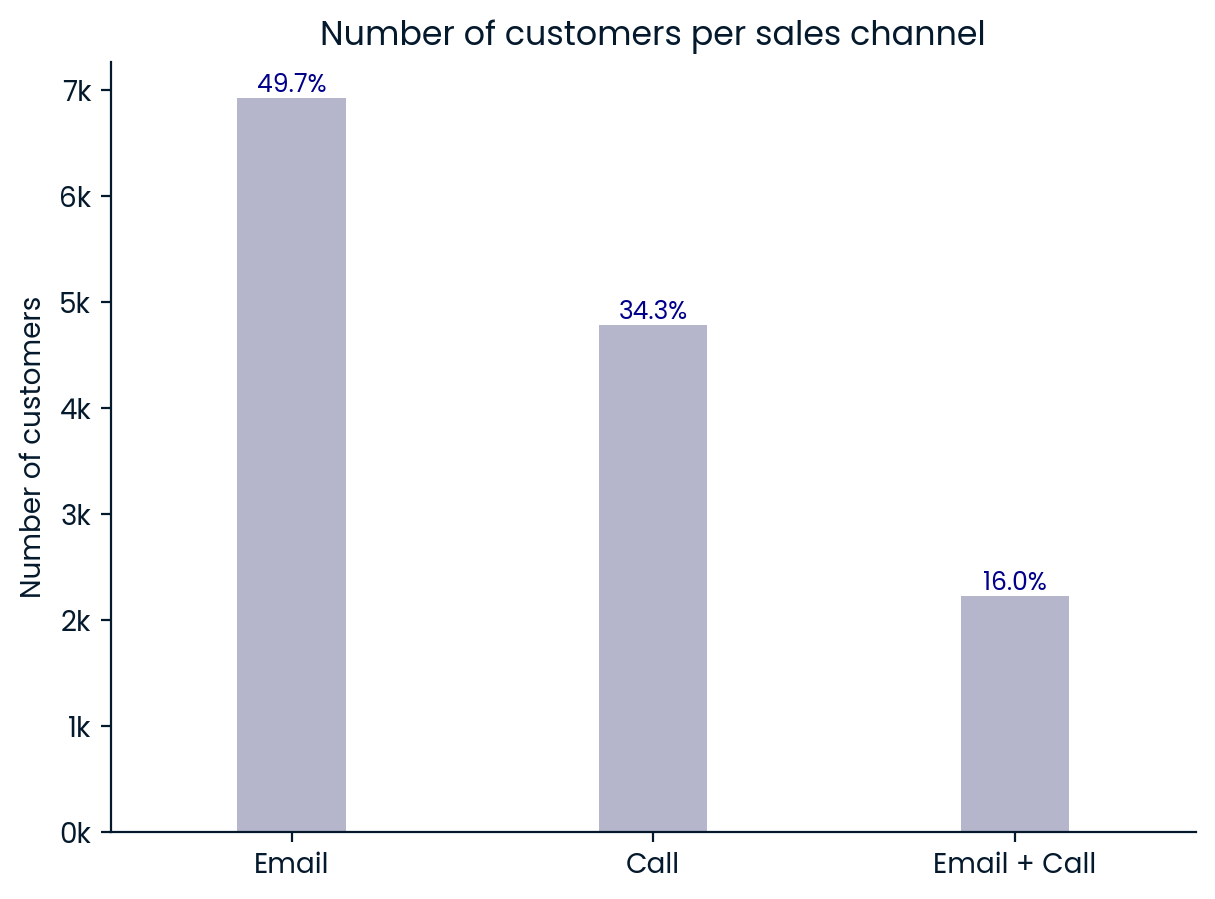

In [15]:
fig, ax= plt.subplots(figsize=(7,5))
customers = df.groupby('sales_method', as_index=False)['customer_id'].count().sort_values(by='customer_id',ascending=False)
print(f'Número de clientes por enfoque: \n {customers}')
sns.barplot(data=customers, x='sales_method', y='customer_id', alpha=0.5, width=0.3)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format((p.get_height()/df['customer_id'].count() * 100)), (p.get_x()+0.15, p.get_height()+1),
              ha = 'center', va='bottom', size='9', color='darkblue')
sns.despine()
plt.ylabel('Number of customers')
ax.yaxis.set_major_formatter(FuncFormatter(miles_formatter))
plt.xlabel('')
plt.title('Number of customers per sales channel')
plt.xticks(rotation=0)
plt.show()

## 2.2 Total sales and profits by sales channel
The channel that generates the most sales is email. To date, 6,922 sales have been recorded and approximately US$672,317.8 in revenue, which corresponds to 51.4% of the company's total revenue. Telephone calls, while second in terms of generating effective sales, are much more costly to manage and reduce profit margins. In this sense, although the sales channel that includes emails and shorter phone calls generates fewer sales, the profit margin is much higher than that generated by the telephone sales channel. The gross revenue generated by the combined channel (US$408,256.7 - 31.2%) nearly doubles that generated by the telephone sales channel (US$227,563.5 - 17.4%).

Number of sales, revenue and percentage of total revenue generated by approach:
    sales_method  nb_solds    Revenue  revenue_method
0         Email      6922  672317.83           51.40
1          Call      4781  227563.49           17.40
2  Email + Call      2223  408256.69           31.21


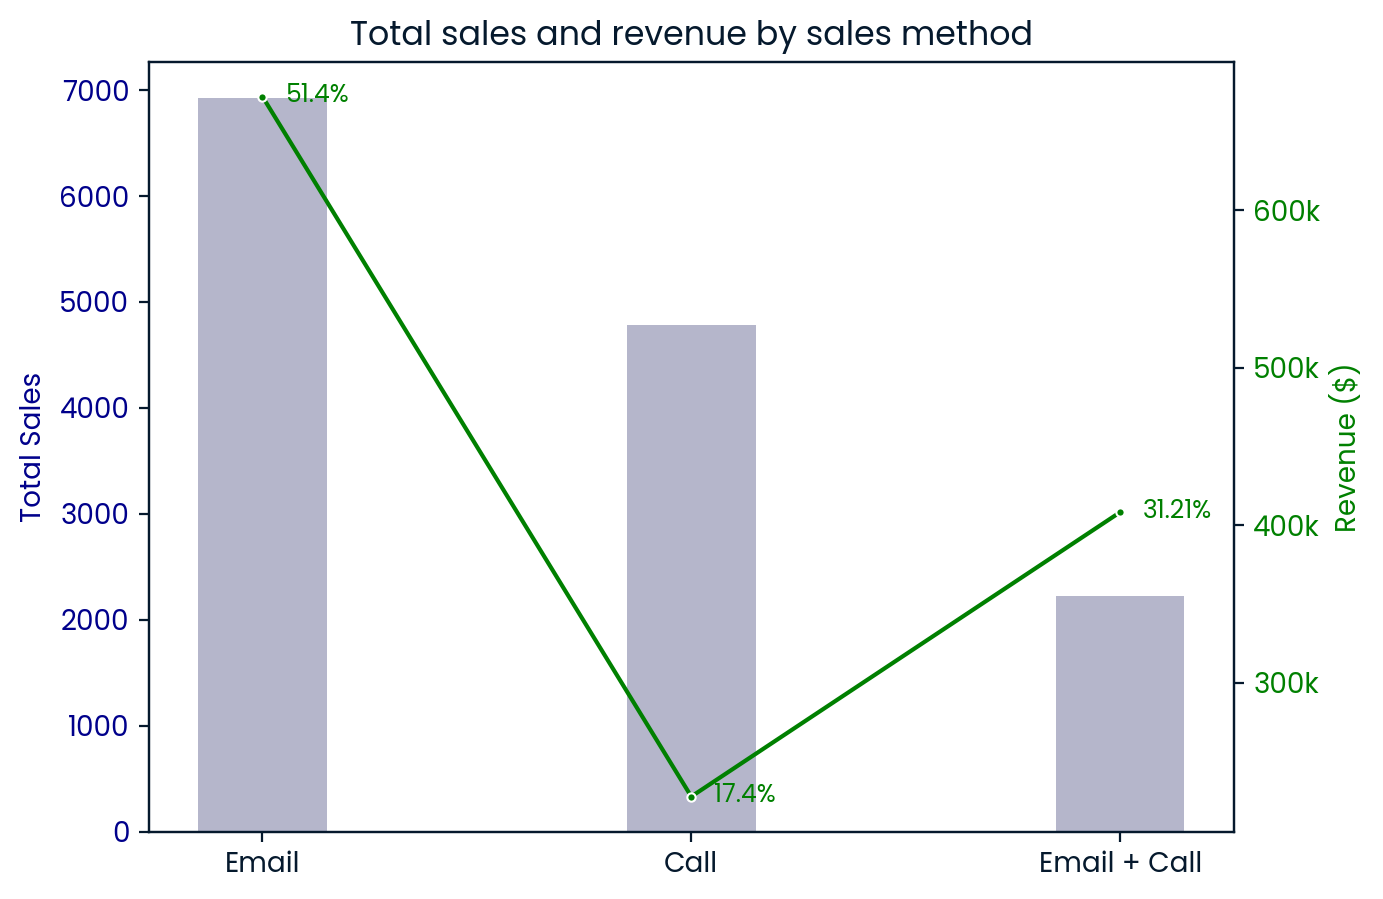

In [16]:
#Plot 3: Total Sales and total Revenue by sales method
SalesMethod = df.groupby('sales_method').agg(nb_solds=('nb_sold','count'), Revenue=('revenue','sum')).sort_values(by='nb_solds', ascending=False)
SalesMethod['revenue_method'] = (df.groupby('sales_method')['revenue'].sum()/df.revenue.sum()).mul(100).round(2) 
SalesMethod = SalesMethod.reset_index()
print(f'Number of sales, revenue and percentage of total revenue generated by approach:\n {SalesMethod}')

fig, ax= plt.subplots(figsize=(7, 5))
sns.barplot(data=SalesMethod, x='sales_method', y='nb_solds', ax=ax,alpha=0.5, width=0.3)
ax.set_ylabel('Total Sales', color='darkblue')
ax.set_xlabel('')

ax1 = ax.twinx()
ax.tick_params(axis='y', labelcolor='darkblue')
sns.lineplot(data=SalesMethod, x='sales_method', y='Revenue', ax=ax1, color='g', marker='.')
ax1.set_ylabel('Revenue ($)', color='green')
ax1.tick_params(axis='y',labelcolor='green')
ax1.yaxis.set_major_formatter(FuncFormatter(miles_formatter))

for i, row in SalesMethod.iterrows():
    ax1.annotate(f"{row['revenue_method']}%",
                 xy=(row['sales_method'], row['Revenue']),
                 xytext=(8, -2),
                 textcoords='offset points',
                 ha='left',
                 color='green',
                 fontsize=9)
plt.title('Total sales and revenue by sales method')
plt.show()

In general, it can be established that in the combined channel, meaning email and phone calls, both the average number of products sold and the average revenue generated are higher compared to other sales channels. It can be seen that the average revenue obtained from sales through the combined channel exceeds the revenue obtained from email sales by approximately 40%, and these, in turn, are double those obtained from telephone sales.

In [17]:
#Overall average of products sold and profits by sales channel
df.groupby('sales_method').agg({'nb_sold':'mean', 'revenue' : 'mean'})

,nb_sold,revenue
sales_method,,
Call,9.500941,47.597467
Email,9.723057,97.127684
Email + Call,12.186685,183.651233


## 2.3 Frequency Distribution of Profits

By analyzing the frequency distribution of profits generated from the company's sales, we can establish that the most frequently obtained profits are mostly concentrated around the 100 and 50 US dollar ranges.

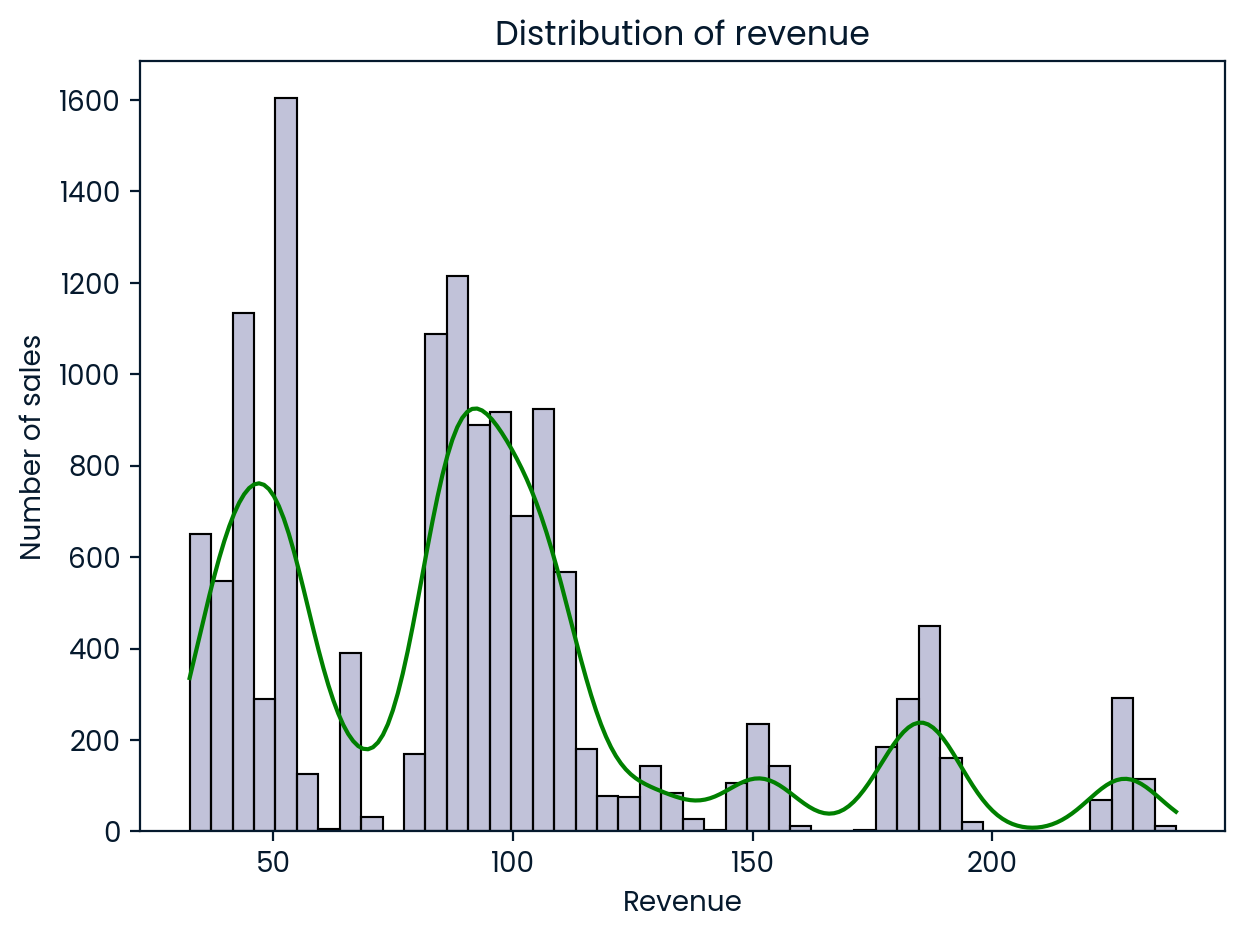

In [18]:
#Plot 1: Revenue distribution
fig, ax= plt.subplots(figsize=(7, 5))
ax = sns.histplot(data=df, x="revenue", kde=True, alpha=0.4)
ax.lines[0].set_color('green')
plt.xlabel('Revenue')
plt.ylabel('Number of sales')
plt.title('Distribution of revenue')
plt.show()

## 2.4 Sales Distribution by State
Regarding market presence, we can establish that 12.5% ​​of the company's total sales are made to customers located in the state of California. A significant percentage of its customers are located in the states of Texas (8%), New York (6.5%), and Florida (5.9%).

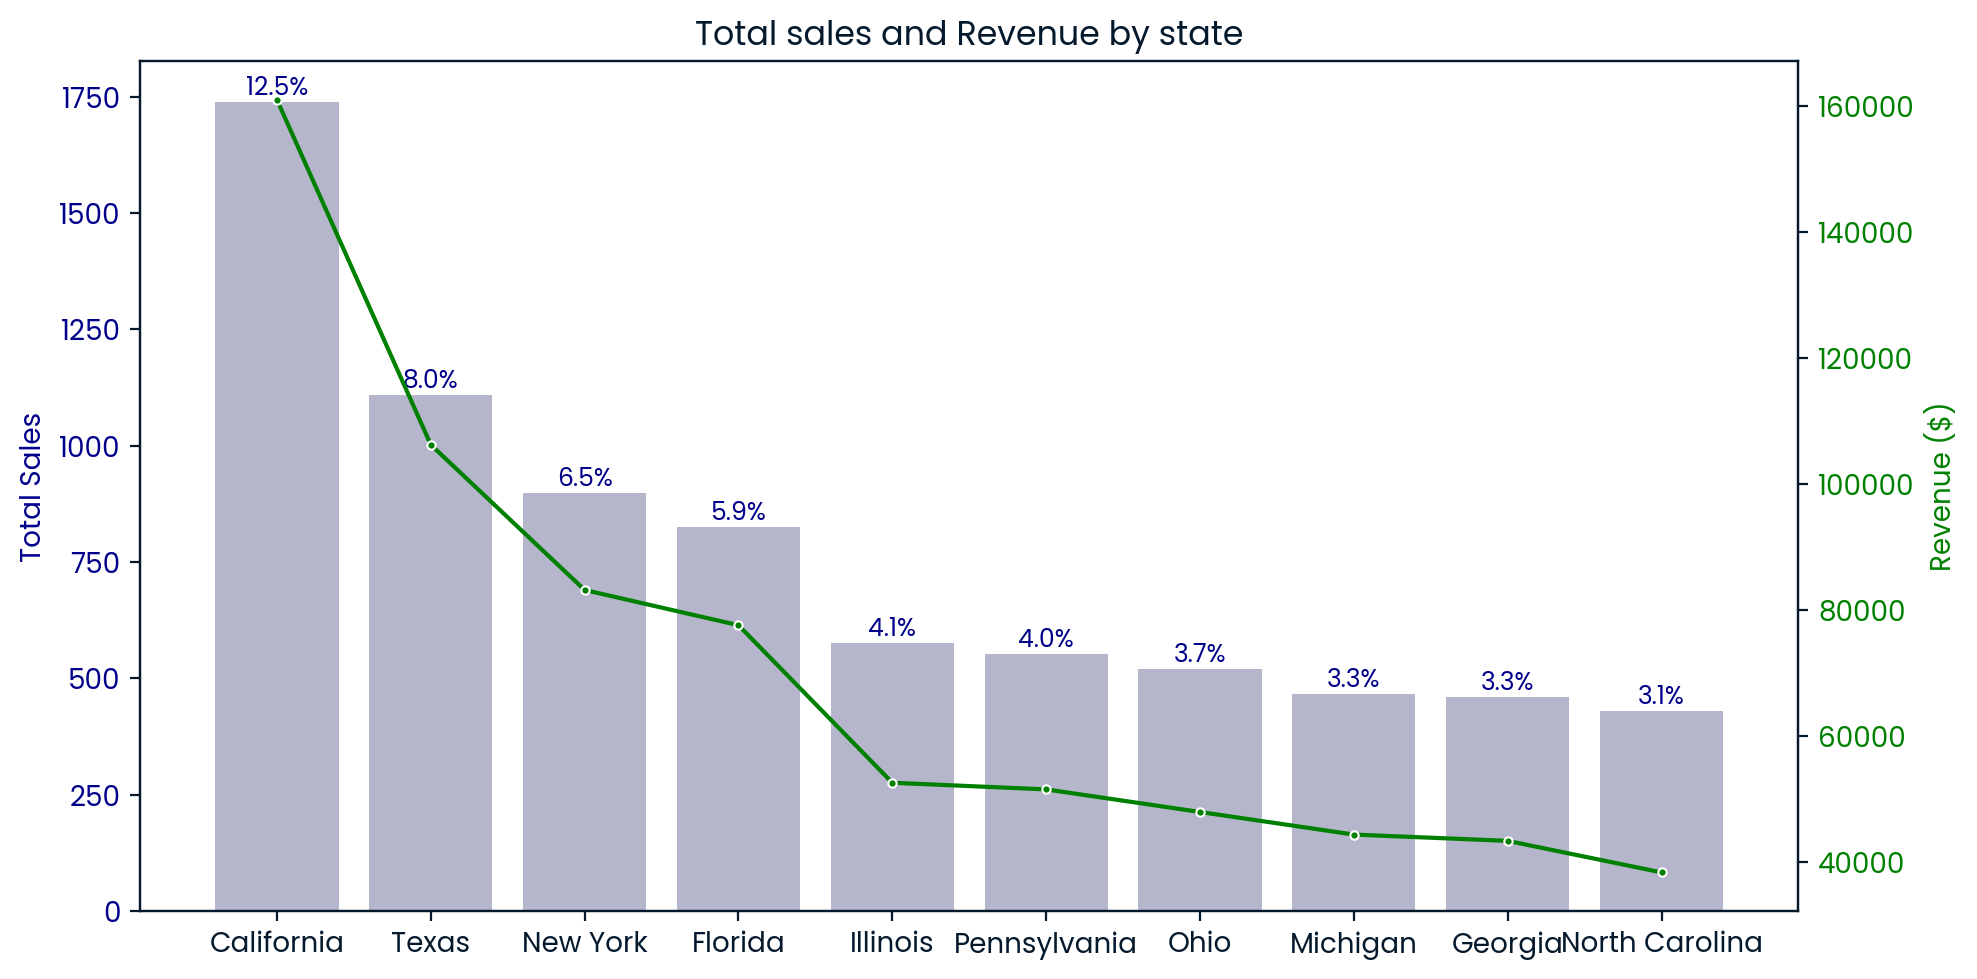

In [19]:
#Plot 4: Total sales and revenue by state
Top10_states = df.groupby('state', as_index= False).agg(nb_solds=('nb_sold', 'count'),Revenue=('revenue','sum')).sort_values(by='nb_solds', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=Top10_states, x='state', y ='nb_solds', alpha=0.5, ax=ax)
ax.tick_params(axis='y', labelcolor='darkblue')
ax.set_xlabel('')
ax.set_ylabel('Total Sales', color='darkblue')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format((p.get_height()/df['state'].count() * 100)), (p.get_x()+0.4, p.get_height()+1),
              ha = 'center', va='bottom', size='9', color='darkblue')
ax1 =ax.twinx()

sns.lineplot(data=Top10_states, x='state', y='Revenue', color='g',ax=ax1, marker='.')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_ylabel('Revenue ($)', color='g')
plt.title('Total sales and Revenue by state')
plt.tight_layout()
plt.show()

## 2.5 Sales Evolution by Week and Sales Method
### 2.5.1 Total Revenue and Products Sold
In the graph below, we can observe the six-week evolution of total revenue and the number of sales generated by each sales channel. In the case of email sales, a steady decline can be seen over time for both total sales and revenue. However, in both cases, the telephone and combined sales channels show a gradual increase from the start of the campaign until week five, when they decline. Specifically, the most dramatic drop occurs during week six, when the number of total effective sales through the telephone channel drops to a value lower than that obtained during the first week. Regarding revenue, although the telephone channel generates a greater number of sales, from the third week onward, the total revenue generated by the combined channel far exceeds that generated by the telephone channel.

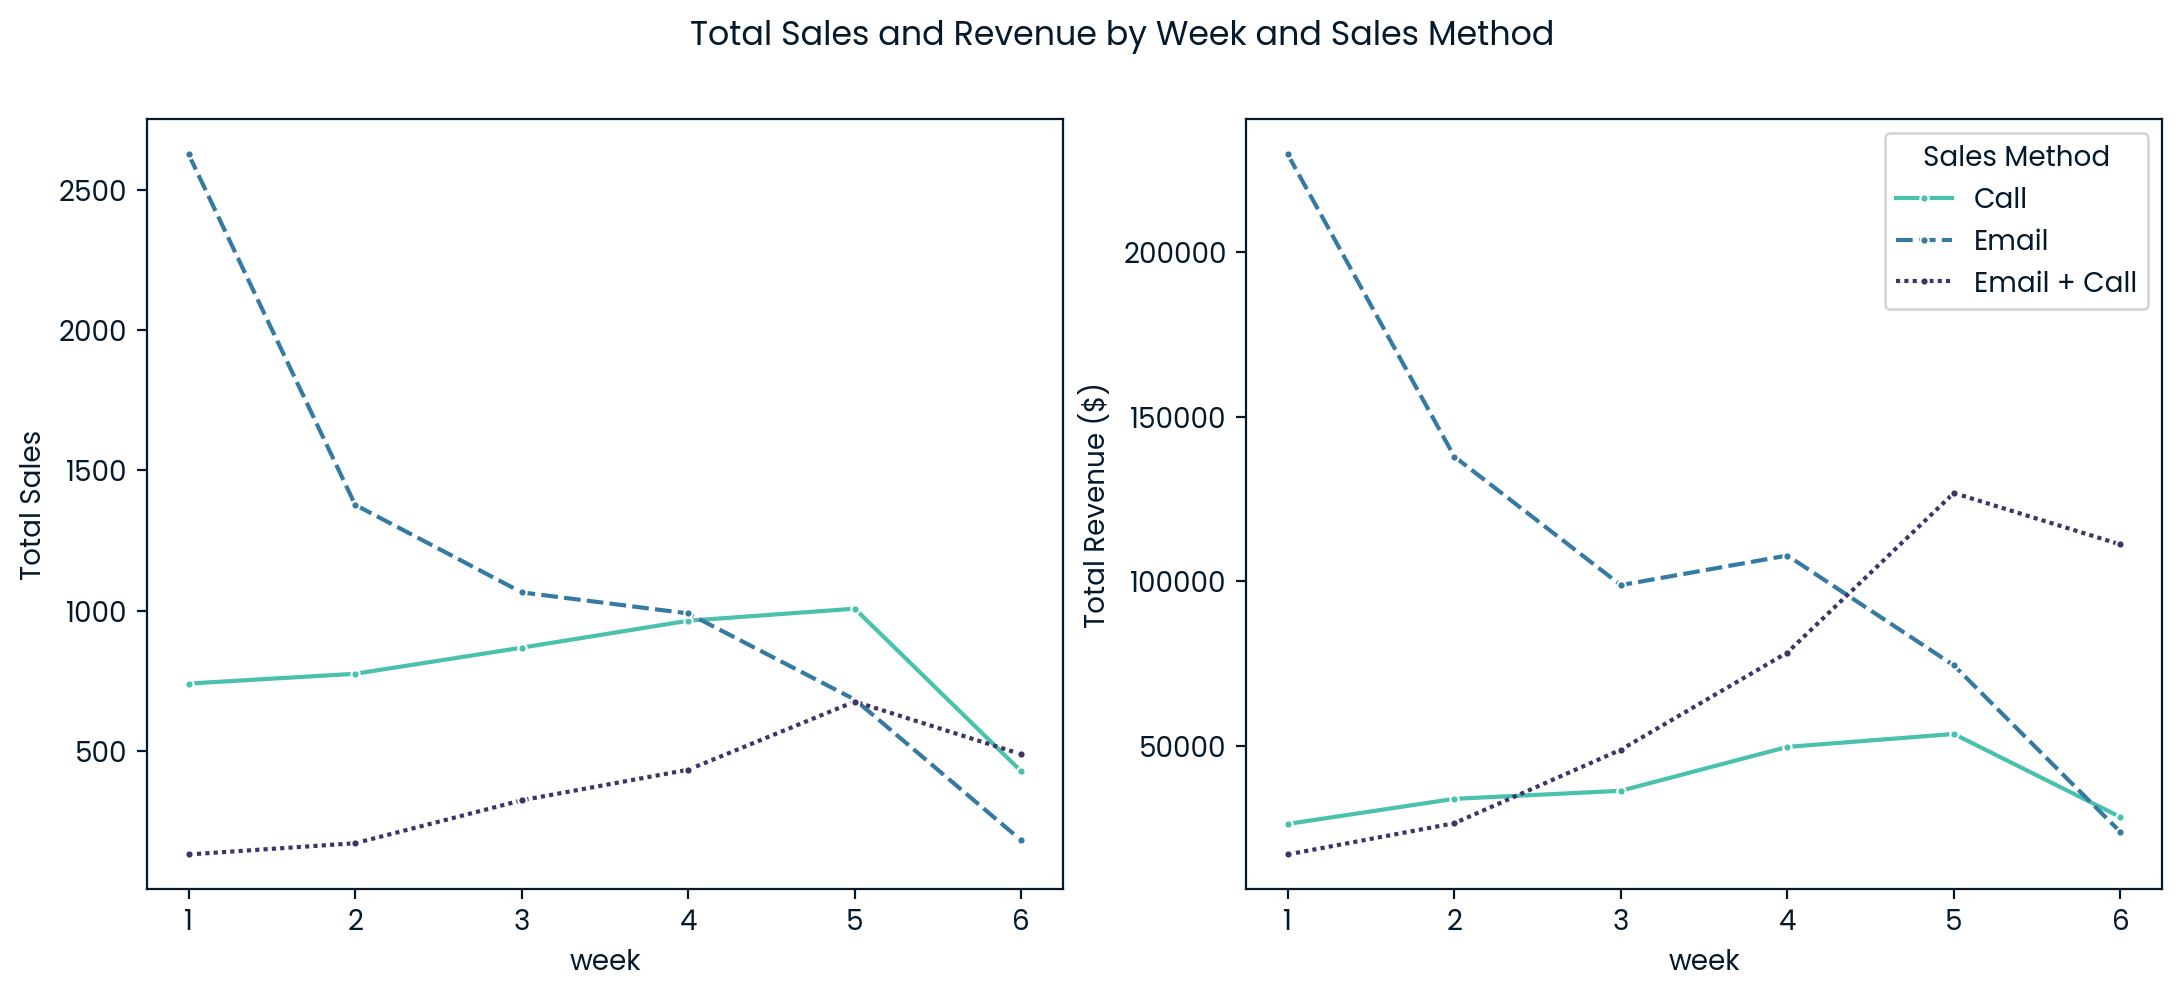

In [20]:
#Total sales and total revenue by week and sales method
sales_over_time = df.groupby(['week','sales_method'], as_index=False).agg(Revenue =('revenue','sum'), 
                                                                          nb_solds=('nb_sold','count'))
palette = sns.color_palette("mako_r", 3)
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
sns.lineplot(data=sales_over_time, x='week',y='Revenue', hue='sales_method',style='sales_method', marker='.',
             palette=palette, ax=ax2)
sns.lineplot(data=sales_over_time, x='week',y='nb_solds', hue='sales_method',style='sales_method', marker='.',
             palette=palette, ax=ax1)
ax2.set_ylabel('Total Revenue ($)')
ax1.set_ylabel('Total Sales')
#ax2.set_ylabel('Total Sales')
fig.suptitle('Total Sales and Revenue by Week and Sales Method')
ax2.legend(title='Sales Method')
ax1.legend().remove()
plt.show()

### 2.5.2 Average revenue and products sold
Now, regarding average revenue per sale, we can establish that over time it increases for all channels, in order: the combined channel with the highest revenue, email, and finally the telephone channel with the lowest average revenue per sale. A similar trend is observed regarding the number of products per sale; the overall trend is positive, although with declines during week 3, particularly for the email and telephone sales channels. At the end of the analysis period, the latter recorded an average of 13 products per sale, compared to 15 products for the combined channel.

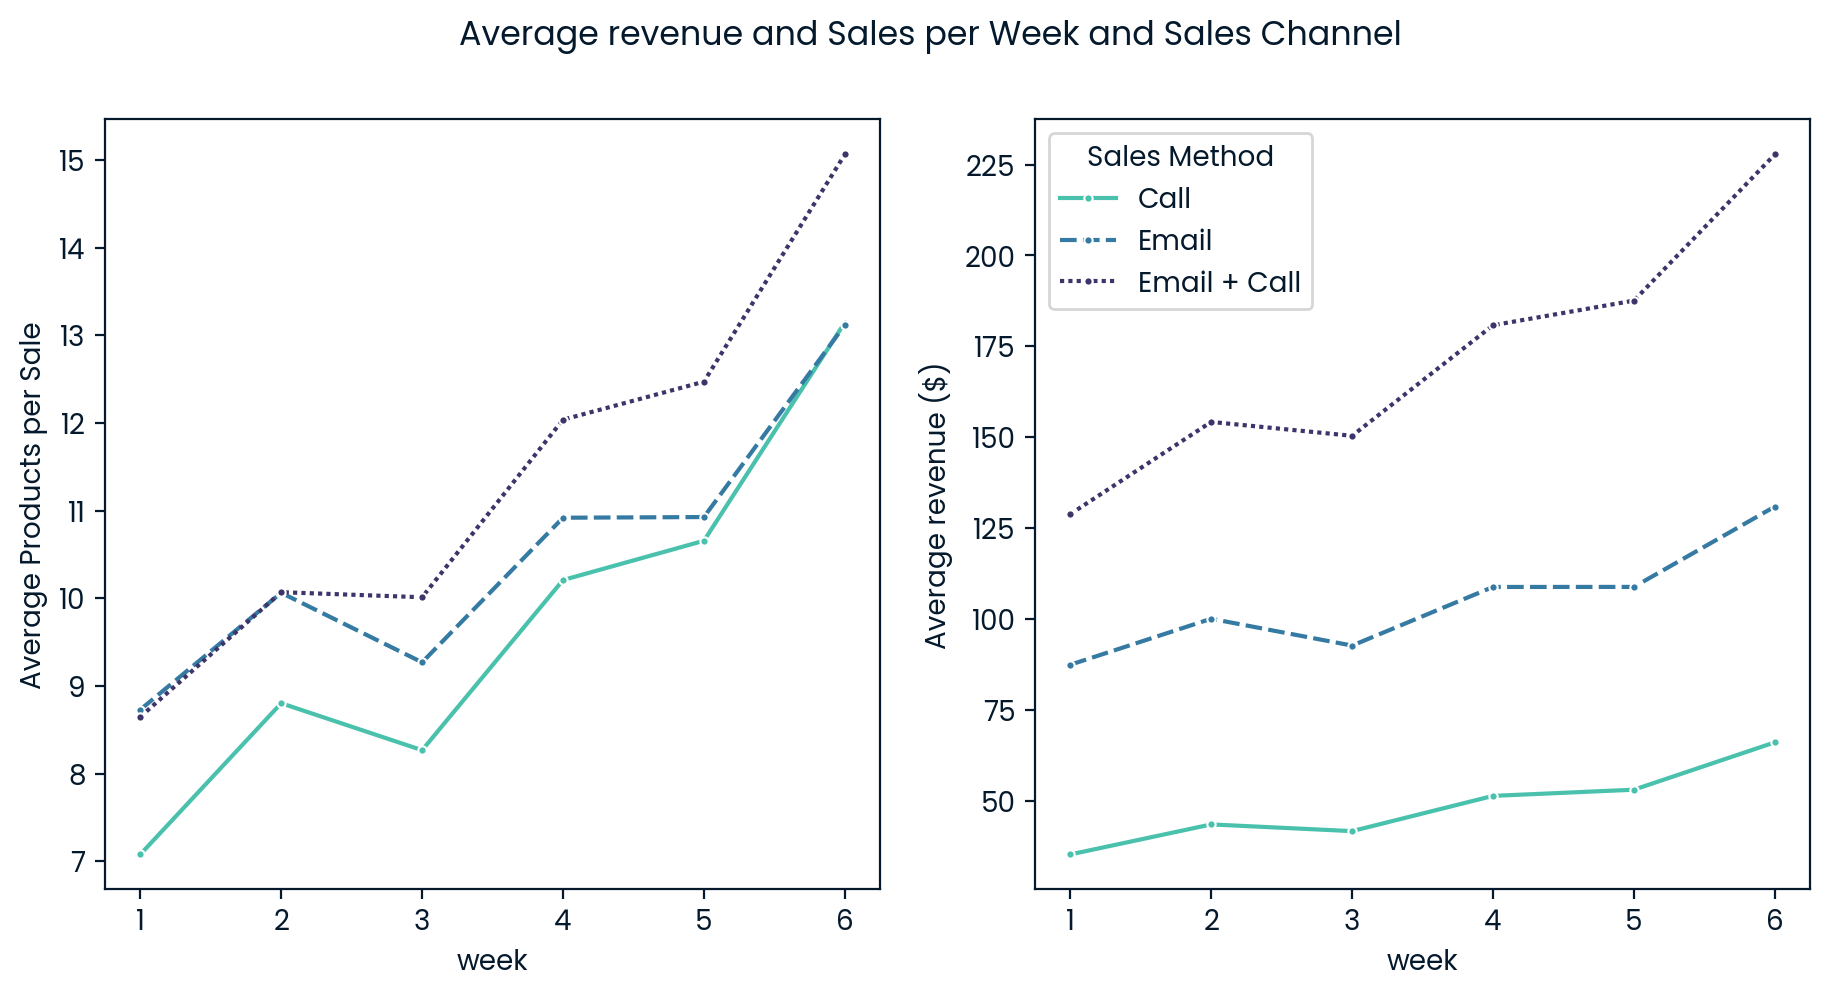

In [21]:
#Average products sold and average revenue per week and sales method
sales_over_time_m = df.groupby(['week','sales_method'], as_index=False).agg(Revenue =('revenue','mean'),
                                                                            nb_solds=('nb_sold','mean'))
palette = sns.color_palette("mako_r", 3)
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(11,5))
sns.lineplot(data=sales_over_time_m, x='week',y='Revenue', hue='sales_method',style='sales_method', marker='.',
             palette=palette, ax=ax2)
sns.lineplot(data=sales_over_time_m, x='week',y='nb_solds', hue='sales_method',style='sales_method', marker='.',
             palette=palette, ax=ax1)
ax2.set_ylabel('Average revenue ($)')
ax1.set_ylabel('Average Products per Sale')
fig.suptitle('Average revenue and Sales per Week and Sales Channel')
ax2.legend(title='Sales Method')
ax1.legend().remove()
plt.show()

# 3. Choosing a Sales Channel

Once the data provided has been analyzed, it is recommended to focus the company's sales on the combined and email channels. The telephone channel, although it generates sales, is the one that generates the lowest profit margin for the company due to the higher cost (compared to other channels) derived from the time spent making the calls. The combined channel is the one that presents the best results; sending information about the company's products and then calling customers generates greater loyalty and, consequently, both sales and profits increase. Regarding the email sales channel, it could be retained to generate sales passively. However, if the company's objective is to increase sales, it is necessary to encourage direct contact with the customer.

# 4. Evaluation Metric
#### Percentage of total revenue by method and unit of time
To evaluate the company's sales progress by sales channel and more effectively monitor its revenue, the initial plan was to calculate the percentage of revenue from the total by week and sales channel. This would provide a record of each channel's contribution to weekly revenue, allowing the company to make any necessary adjustments to its sales channels if results differ from its business objectives. In this case, during the first four weeks, the largest contribution to the company's revenue was made by sales through the email channel. However, by weeks 5 and 6, when the campaign's novelty was presumed to be less prominent, sales through the combined email and phone channels predominated, contributing approximately 50% and 68% of total revenue in weeks 5 and 6, respectively.

In [22]:
def revenue_share_by_channel(df, time_col='week', group_col='sales_method', value_col='revenue'):
    sales = df.groupby([time_col, group_col])[value_col].sum().unstack()
    total = df.groupby(time_col)[value_col].sum()
    pct_share = sales.div(total, axis=0)
    return pct_share

In [23]:
revenue_share = revenue_share_by_channel(df)
revenue_share.style.format('{:.2%}').background_gradient(axis=1,cmap='Blues')

sales_method,Call,Email,Email + Call
week,,,
1,9.59%,84.22%,6.19%
2,17.06%,69.62%,13.32%
3,19.72%,53.76%,26.52%
4,21.04%,45.74%,33.22%
5,21.01%,29.20%,49.79%
6,17.32%,14.53%,68.14%


However, it is also necessary to monitor overall revenue trends, and for this purpose, it is suggested to calculate the percentage change in revenue week over week. This would provide insight into revenue trends compared to the previous period and allow for adjustments to the sales strategy as needed to achieve the company's objectives: increasing sales and, consequently, profits.

In [24]:
def weekly_revenue_change(df, time_col='week', value_col='revenue'):
    weekly = df.groupby(time_col, as_index=False)[value_col].sum().round(2)
    weekly['pct_change'] = weekly[value_col].pct_change().round(2).mul(100)
    weekly['pct_change'] = weekly['pct_change'].fillna(0)
    return weekly

In [25]:
weekly_change = weekly_revenue_change(df)
weekly_change.style.format('{:.2f}').background_gradient(subset=['pct_change'], cmap='Blues')

,week,revenue,pct_change
0,1.00,272810.06,0.00
1,2.00,198059.82,-27.00
2,3.00,183776.55,-7.00
3,4.00,235678.56,28.00
4,5.00,254701.28,8.00
5,6.00,163111.74,-36.00


In this regard, it can be said that during the first three weeks, Pen&Printers saw a significant decline in the company's revenue. In the second week, revenue fell 27% compared to the first, and in the third week, a further 7% decrease was recorded compared to the previous week. However, in the fourth week, revenue increased 28% compared to the third week, a positive trend that continued in the fifth week with an additional 8% increase. However, in the sixth week, revenue dropped dramatically by 36%.

# 5. Final Summary and Recommendations
Based on the previous analysis, it is recommended to consider the combined method as the primary sales channel, that is, the one that includes sending emails followed by a call from the salesperson to the customer. This approach has proven to perform best compared to the other methods used by the company during the analyzed time period. The overall trend for this channel, whether considering total or average revenue over time, shows the best performance. Likewise, the number of sales and average number of products per sale are also significant. On the other hand, the email sales channel is recommended for generating passive income. Although this channel initially seemed very popular, it showed a dramatic decline in sales and profits over the weeks, even though the average profit per sale increased week by week. In this sense, it is recommended to emphasize customer contact to generate greater loyalty and improve the business's sales outlook, while also implementing best practices for delivering information or related offers via email. Regarding the telephone sales channel, although it generates a higher number of sales overall than the combined channel, the management cost of this channel is higher than the other methods and significantly reduces the profit generated from its sales.

Regarding metrics for tracking or evaluating sales progress, two approaches are recommended: one in which the percentage of revenue contributed by each sales channel per week is calculated. This way, the company can clearly establish each channel's contribution to total revenue and monitor its evaluation week by week. Second, it is recommended to monitor overall revenue progress and determine the percentage change compared to the previous period. This way, necessary actions can be taken in a timely manner to adjust the sales strategy in line with business objectives.

Regarding data quality, it is suggested that data collection practices be improved to avoid the loss of valuable information for analysis. Special attention is recommended to data validation to avoid null values ​​or values ​​that exceed variable limits.

In summary, it is recommended to use the combined channel as the primary sales channel and email sales as a secondary channel. Emphasis is placed on customer contact to achieve customer loyalty and improve the business's sales outlook. Regarding evaluation metrics, it is recommended to monitor the percentage change in total revenue week over week and, on the other hand, the percentage of revenue in the total by channel and week. Finally, it is recommended to improve data management and validation practices.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation